In [93]:
import numpy as np
import pandas as pd
from random import sample,choice
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics
from sklearn import linear_model
import statsmodels.api as sm

In [359]:
def generate_dataset (beta, n, std_dev):
    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.random(n) * 100
    #x = np.arange(0, n)
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    x = x.reshape((-1, 1))
    return x, y

def generate_multiple_dataset (beta, n, std_dev):
    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.random(n) * 100
    #x = np.arange(0, n)
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    x = x.reshape((-1, 1))
    return x, y


# Train the model using the training data that we created

def residuals_stat (residuals, n_slice):
    res_var = []
    res_mean = []
    slice_size = int(len(residuals)/n_slice)
    for i in range(0,len(residuals),slice_size):
        res_var.append(statistics.variance(residuals[i:i+slice_size]))
        res_mean.append(statistics.mean(residuals[i:i+slice_size]))
    return res_var, res_mean

n_slice = 60
y_sliced = list(range(1,n_slice+1))

res_var_df = None
n_repeat = 20
res_var_df = pd.DataFrame(columns=list(range(1,n_slice+1)))
res_mean =[]
for j in range (0,n_repeat):
    res_df = None
    res_df = pd.DataFrame(columns=y_sliced)
    for i in range (0,50):
        x, y = generate_dataset_simple (15, n_slice, 10)
        model = linear_model.LinearRegression()
        model.fit(x, y)
        # We then use the model to make predictions based on the test values of x
        y_pred = model.predict(x)
        residuals = (y - y_pred)
    #r_v, r_m = residuals_stat (residuals,n_slice)
    #res_var_df.append(r_v)
        res_df.loc[len(res_df.index)] = residuals
    res_var_df.loc[len(res_var_df.index)] = res_df.var(axis=0)

#mean_var = [statistics.mean(res_var) for res_var in res_var]
#var_series = res_var_df.var(axis=0)
#plt.scatter(var_series,y)



In [332]:
t=scipy.stats.levene(*res_var_df.iloc[:,0:4].values.transpose())
print (t)
t=scipy.stats.levene(res_var_df[1],res_var_df[2],res_var_df[3],res_var_df[4])
print (t)

LeveneResult(statistic=1.5597218057847244, pvalue=0.20048112035729904)
LeveneResult(statistic=1.5597218057847244, pvalue=0.20048112035729904)


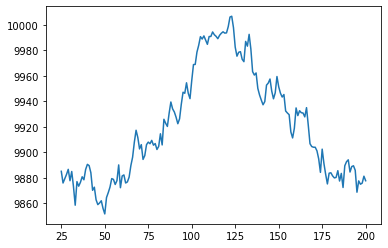

In [259]:
def generate_dataset_simple (beta, n, std_dev):
    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.random(n) * 100
    #x = np.arange(0, n)
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    # Calculate `y` according to the equation discussed
    y = 25+x * beta + e
    x = x.reshape((-1, 1))
    return x, y


# Train the model using the training data that we created

def residuals_stat (residuals, n_slice):
    res_var = []
    res_mean = []
    slice_size = int(len(residuals)/n_slice)
    for i in range(0,len(residuals),slice_size):
        res_var.append(statistics.variance(residuals[i:i+slice_size]))
        res_mean.append(statistics.mean(residuals[i:i+slice_size]))
    return res_var, res_mean

n_slice = 200
y_sliced = list(range(1,n_slice+1))

res_var_df = None
n_repeat = 10000
res_df = pd.DataFrame(columns=list(range(1,n_slice+1)))
res_mean =[]
for i in range (0,n_repeat):
    x, y = generate_dataset_simple (15, n_slice, 100)
    model = linear_model.LinearRegression()
    model.fit(x, y)
    # We then use the model to make predictions based on the test values of x
    y_pred = model.predict(x)
    residuals = (y - y_pred)
    #r_v, r_m = residuals_stat (residuals,n_slice)
    #res_var_df.append(r_v)
    sorted_res = [x for _,x in sorted(zip(x,residuals))]
    res_df.loc[len(res_df.index)] = sorted_res

#mean_var = [statistics.mean(res_var) for res_var in res_var]
var_series = res_df.var(axis=0)
plt.plot(var_series.rolling(25).mean())



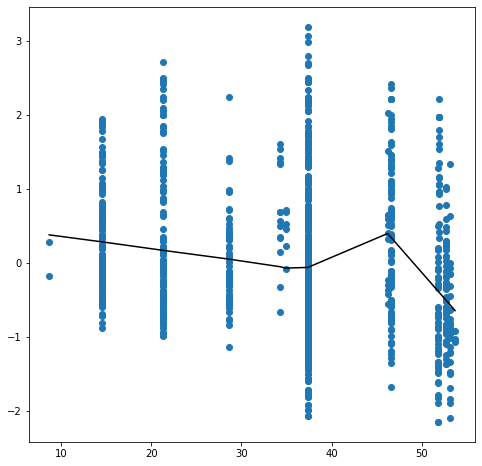

In [274]:
cement_data_file = 'D:/Personal/Data Projects/Towards Data Science/01-Residuals/Code&Data/Concrete_Data.xls'
cement_df = pd.read_excel (cement_data_file)
model = linear_model.LinearRegression()
x = cement_df['Age'].values.reshape(-1,1)
x1 = x
x2 = x**0.5
x3 = np.log(x)
X = np.column_stack((x1, x2))
y = cement_df['Concrete compressive strength'].values.reshape(-1,1)

model = sm.OLS(y, X)
results = model.fit()

#print(results.summary())
#results.resid
influence = results.get_influence()
inf_sum = influence.summary_frame()
fig, ax = plt.subplots(figsize=(8,8))
y_pred = results.predict(X)
st_res = inf_sum.standard_resid
ax.plot(y_pred, st_res, 'o')


lowess = sm.nonparametric.lowess
z = lowess(st_res.values,y_pred)
ax.plot(z[:,0],z[:,1], color='black')
plt.show()

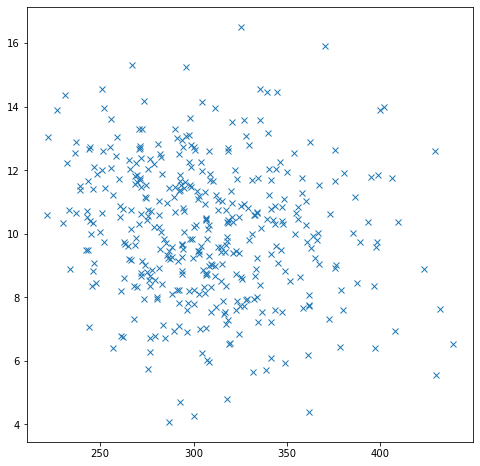

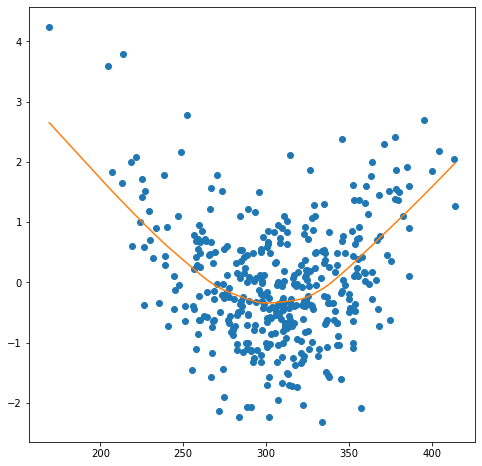

"\nfrom scipy.interpolate import UnivariateSpline\n\nres_array = np.vstack([y_pred, st_res.values])\nres_array_sort = res_array[:,res_array[1,:].argsort()]\nspl = UnivariateSpline(res_array_sort[1,:], res_array_sort[0,:])\nspl.set_smoothing_factor(0.5)\nxs = np.linspace(200, 400, 1000)\nplt.plot(xs, spl(xs), 'g', lw=3)\nplt.plot "

In [210]:
# From R program


nsample = 400        # sample size 
b0 = 300      # true intercept for house price in thousands
b1 = 6        # true parameter for price per thousands of square feet 
b2 = -7       # true parameter for age of house 
sigma = 10    # variance of the errors
e = np.random.normal(0, sigma, nsample)

# means of independent variables distributions
mu_sqft = 3   
mu_age_years = 10   
mu_age_months = 120 #this value is always 12 times of the age years
# variances of independent variables distributions
sigma_sqft = 1  
sigma_age_years = 5  
sigma_age_months = 60 
# covariance  
X_sqft = 0.5 # equivalent to 20% correlation between sqft and age_years
X_age_years = 17  # equivalent to near perfect correlation between age_years and age_months
X_age_months = 1.7 # equivalent to 20% correlation between sqft and age_months



mean = [mu_sqft, mu_age_years, mu_age_months]
cov = [[sigma_sqft,   X_sqft,           X_age_months],
       [X_sqft,       sigma_age_years,  X_age_years],
      [ X_age_months, X_age_years,      sigma_age_months]]  # diagonal covariance
sqf, age_year, age_months = np.random.multivariate_normal(mean, cov, nsample).T
Y = b0 + b1*sqf + b1*sqf**2 + b2*age_year + e
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(Y, age_year, 'x')
plt.show()

X = np.column_stack((sqf, age_year, np.ones(nsample)))
#m = np.column_stack((xs, x1, x2, y))
#np.savetxt("foo.csv", m, delimiter=",")
model = sm.OLS(Y, X)
results = model.fit()
#print(results.summary())
#results.resid
influence = results.get_influence()
inf_sum = influence.summary_frame()
inf_sum.standard_resid
fig, ax = plt.subplots(figsize=(8,8))
y_pred = results.predict(X)
st_res = inf_sum.standard_resid
ax.plot(y_pred, st_res, 'o')


lowess = sm.nonparametric.lowess
z = lowess(st_res.values,y_pred)
ax.plot(z[:,0],z[:,1])
plt.show()

In [264]:
np.log(cement_df['Age'].describe())

count    6.937314
mean     3.821269
std      4.145828
min      0.000000
25%      1.945910
50%      3.332205
75%      4.025352
max      5.899897
Name: Age, dtype: float64

In [258]:
np.exp(1)

2.718281828459045